In [1]:
import sys
!{sys.executable} -m pip install matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

You should consider upgrading via the 'C:\Users\PC\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv("E:/Downloads/lin_reg_question_raw/question_raw/day_dataset.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape


(730, 16)

In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df1 = df.drop(['instant','dteday','casual','registered'],axis='columns')
df1.shape
df1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [9]:
season_cat={1:"spring",2:"summer",3:"fall",4:'winter'}

df1.season=[season_cat[item] for item in df1.season]

In [10]:
weathersit_cat={1:"clear",2:"mist and cloudy",3:"light rain and snow",4:'heavy rain and snow'}

df1.weathersit=[weathersit_cat[item] for item in df1.weathersit]

In [11]:
mnth_cat={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:'Dec'}

df1.mnth=[mnth_cat[item] for item in df1.mnth]

In [12]:
weekday_cat={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}

df1.weekday=[weekday_cat[item] for item in df1.weekday]

In [13]:
year={0: '2018',1: '2019'}

df1.yr=[year[item] for item in df1.yr]

In [14]:
df1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Saturday,0,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Thursday,1,mist and cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,Dec,0,Friday,1,mist and cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,Dec,0,Saturday,0,mist and cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,Dec,0,Sunday,0,clear,10.489153,11.58500,48.3333,23.500518,1796


# visualization

<AxesSubplot:xlabel='season', ylabel='cnt'>

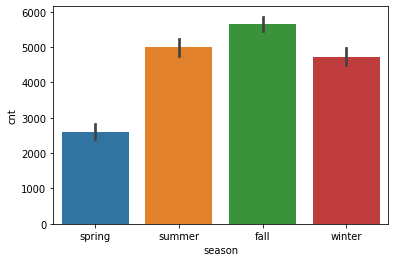

In [15]:
import seaborn as sns
sns.barplot(x='season',y='cnt',data=df1)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

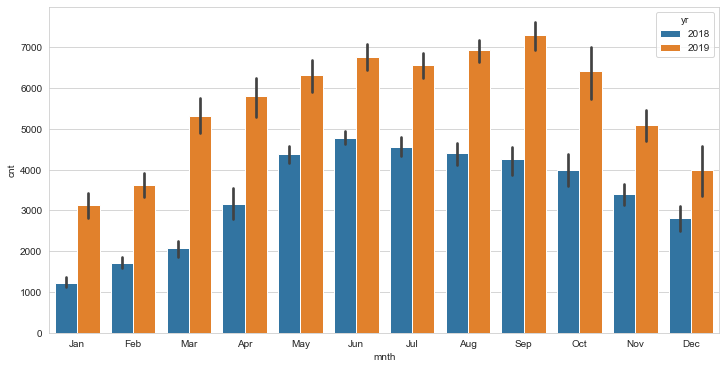

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='mnth',y='cnt',data=df1,hue='yr')

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

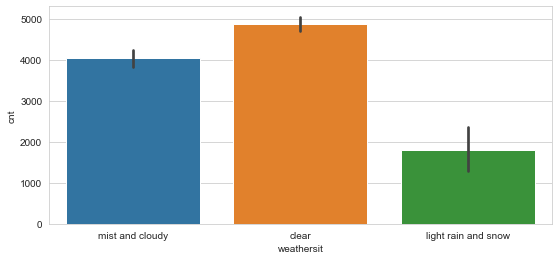

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weathersit',y='cnt',data=df1)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

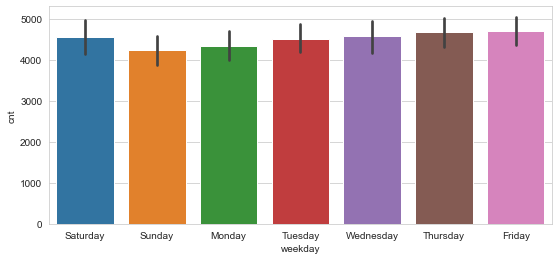

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weekday',y='cnt',data=df1)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

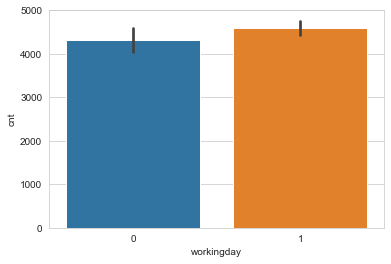

In [19]:
sns.set_style('whitegrid')
# plt.figure(figsize=(9,4))
sns.barplot(x='workingday',y='cnt',data=df1)

<AxesSubplot:>

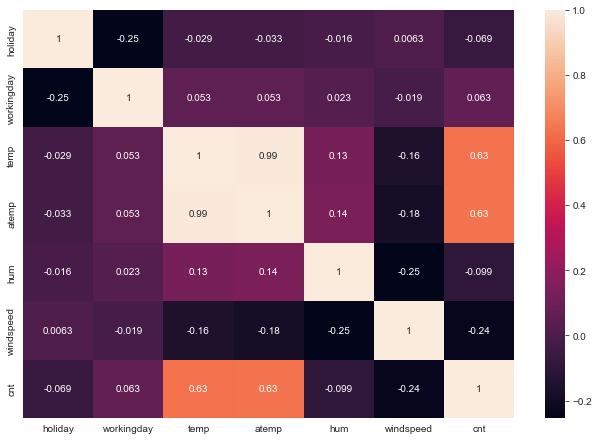

In [20]:
plt.figure(figsize=(11,7.5))
sns.heatmap(df1.corr(),annot=True)

In [21]:
#'temp' and 'atemp' has high correlation of 0.99...Lets romove atemp
df1=df1.drop("atemp",axis=1)

In [22]:
df1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Saturday,0,mist and cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,mist and cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Thursday,1,mist and cloudy,10.420847,65.2917,23.458911,2114
726,spring,2019,Dec,0,Friday,1,mist and cloudy,10.386653,59.0000,10.416557,3095
727,spring,2019,Dec,0,Saturday,0,mist and cloudy,10.386653,75.2917,8.333661,1341
728,spring,2019,Dec,0,Sunday,0,clear,10.489153,48.3333,23.500518,1796


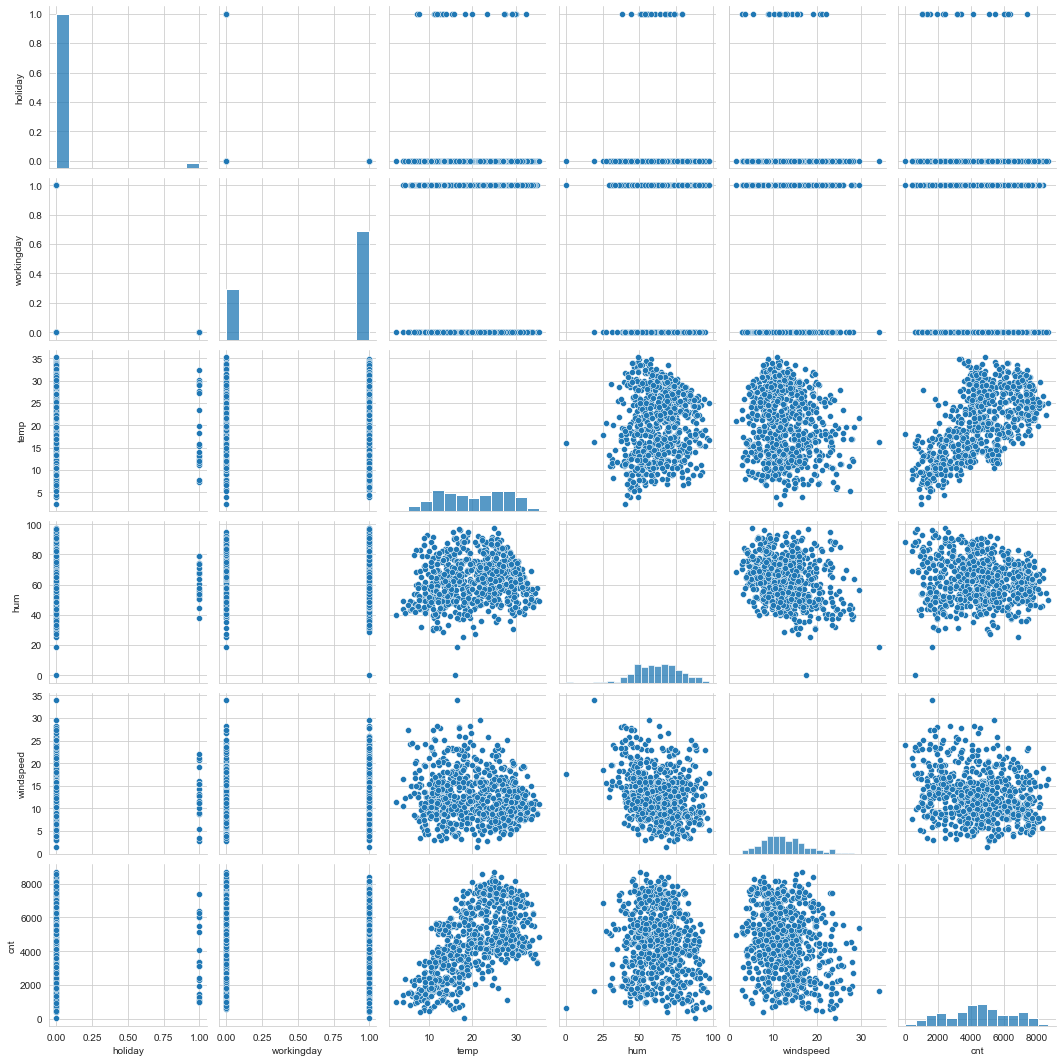

In [23]:
sns.pairplot(df1)

# Data_preparation

In [24]:
months= pd.get_dummies(df1['mnth'],drop_first=True,prefix='mnth')

seasons = pd.get_dummies(df1['season'],drop_first=True,prefix='season')

weather= pd.get_dummies(df1['weathersit'],drop_first=True,prefix='weather')

weekdays= pd.get_dummies(df1['weekday'],drop_first=True,prefix='day')

years= pd.get_dummies(df1['yr'],drop_first=True,prefix='yr')

In [25]:
df1= pd.concat([df1,months,seasons,weather,weekdays,years], axis = 1)

# Looking at the top rows of our dataframe.
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,yr_2019
0,spring,2018,Jan,0,Saturday,0,mist and cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,1,0,0,0,0,0
1,spring,2018,Jan,0,Sunday,0,mist and cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,1,0,0,0,0
2,spring,2018,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,0,0,0
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,0


In [26]:
df1.drop(['season','weathersit','weekday','mnth','yr'],axis=1,inplace=True)

In [27]:
df1

,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,yr_2019
0,0,0,14.110847,80.5833,10.749882,985,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,65.2917,23.458911,2114,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
726,0,1,10.386653,59.0000,10.416557,3095,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
727,0,0,10.386653,75.2917,8.333661,1341,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
728,0,0,10.489153,48.3333,23.500518,1796,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [28]:
#Data_split

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
#scalling

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
vars = ['windspeed' , 'temp' , 'hum','cnt']

df_train[vars] = scaler.fit_transform(df_train[vars])

df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,yr_2019
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

# RFE(Recursive Feature Elimination) AND VIF(Variance Inflation Factor)

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
logmodel = LinearRegression()
logmodel.fit(X_train, y_train)

LinearRegression()

In [36]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_light rain and snow', True, 1),
 ('weather_mist and cloudy', True, 1),
 ('day_Monday', False, 9),
 ('day_Saturday', True, 1),
 ('day_Sunday', False, 3),
 ('day_Thursday', False, 11),
 ('day_Tuesday', False, 8),
 ('day_Wednesday', False, 13),
 ('yr_2019', True, 1)]

In [38]:
# Looking at the cols that RFE selected
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'season_spring', 'season_summer',
       'season_winter', 'weather_light rain and snow',
       'weather_mist and cloudy', 'day_Saturday', 'yr_2019'],
      dtype='object')

In [39]:
X_train_rfe = X_train[col]

In [40]:
X_train_rfe


,holiday,workingday,temp,hum,windspeed,mnth_Jan,mnth_Jul,mnth_Sep,season_spring,season_summer,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Saturday,yr_2019
653,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,1,0,0,0,1
576,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,1
426,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,1,1,1
728,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1,0.824514,0.605840,0.355596,0,0,0,0,1,0,0,1,0,1
578,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,1
53,0,1,0.202618,0.435939,0.111379,0,0,0,1,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,0,0,0,1,0,1,1,0


In [42]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [43]:

X_train_lm = build_model(X_train_rfe,y_train)
checkVIF(X_train_lm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          2.31e-191
Time:                        10:01:20   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
0,const,84.59
9,season_spring,5.08
3,temp,3.89
11,season_winter,3.60
10,season_summer,2.64
4,hum,1.92
2,workingday,1.88
14,day_Saturday,1.78
6,mnth_Jan,1.57
13,weather_mist and cloudy,1.57


In [44]:
#Rebuilding the model after dropping fuelsystem_idi (High P value and High VIF)

In [45]:
X_train_lm = X_train_lm.drop(["holiday"], axis = 1)
print(X_train_lm.columns)

#Build model and check VIF
X_train_lm = build_model(X_train_lm,y_train)
checkVIF(X_train_lm)

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'season_spring', 'season_summer',
       'season_winter', 'weather_light rain and snow',
       'weather_mist and cloudy', 'day_Saturday', 'yr_2019'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.9
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          1.70e-191
Time:                        10:01:20   Log-Likelihood:                 517.44
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.4
Df Model:                          14                                         
Covariance Type

,Features,VIF
0,const,83.44
8,season_spring,5.08
2,temp,3.89
10,season_winter,3.60
9,season_summer,2.64
3,hum,1.92
1,workingday,1.65
13,day_Saturday,1.64
5,mnth_Jan,1.57
12,weather_mist and cloudy,1.57


In [46]:
X_train_lm = X_train_lm.drop(["season_spring"], axis = 1)
print(X_train_lm.columns)

#Build model and check VIF
X_train_lm = build_model(X_train_lm,y_train)
checkVIF(X_train_lm)

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'season_summer', 'season_winter',
       'weather_light rain and snow', 'weather_mist and cloudy',
       'day_Saturday', 'yr_2019'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.3
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          2.53e-191
Time:                        10:01:20   Log-Likelihood:                 514.25
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.2
Df Model:                          13                                         
Covariance Type:            nonr

,Features,VIF
0,const,55.66
2,temp,2.06
3,hum,1.90
1,workingday,1.65
12,day_Saturday,1.64
11,weather_mist and cloudy,1.56
5,mnth_Jan,1.55
9,season_winter,1.53
6,mnth_Jul,1.43
8,season_summer,1.41


In [47]:
X_train_lm = X_train_lm.drop(["mnth_Jan"], axis = 1)
print(X_train_lm.columns)

#Build model and check VIF
X_train_lm = build_model(X_train_lm,y_train)
checkVIF(X_train_lm)

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Jul',
       'mnth_Sep', 'season_summer', 'season_winter',
       'weather_light rain and snow', 'weather_mist and cloudy',
       'day_Saturday', 'yr_2019'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          2.26e-191
Time:                        10:01:20   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust       

,Features,VIF
0,const,51.12
3,hum,1.89
1,workingday,1.65
11,day_Saturday,1.64
2,temp,1.60
10,weather_mist and cloudy,1.56
5,mnth_Jul,1.43
7,season_summer,1.33
8,season_winter,1.29
9,weather_light rain and snow,1.24


In [48]:
X_train_lm = X_train_lm.drop(["mnth_Jul"], axis = 1)
print(X_train_lm.columns)

#Build model and check VIF
X_train_lm = build_model(X_train_lm,y_train)
checkVIF(X_train_lm)

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Sep',
       'season_summer', 'season_winter', 'weather_light rain and snow',
       'weather_mist and cloudy', 'day_Saturday', 'yr_2019'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          2.89e-191
Time:                        10:01:20   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                          

,Features,VIF
0,const,51.12
3,hum,1.87
1,workingday,1.65
10,day_Saturday,1.64
9,weather_mist and cloudy,1.56
2,temp,1.27
7,season_winter,1.25
8,weather_light rain and snow,1.24
6,season_summer,1.19
4,windspeed,1.18


In [49]:
X_train_lm = X_train_lm.drop(["const"], axis = 1)
print(X_train_lm.columns)

#Build model and check VIF
X_train_lm = build_model(X_train_lm,y_train)
checkVIF(X_train_lm)

Index(['workingday', 'temp', 'hum', 'windspeed', 'mnth_Sep', 'season_summer',
       'season_winter', 'weather_light rain and snow',
       'weather_mist and cloudy', 'day_Saturday', 'yr_2019'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          2.89e-191
Time:                        10:01:20   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                   

,Features,VIF
0,const,51.12
3,hum,1.87
1,workingday,1.65
10,day_Saturday,1.64
9,weather_mist and cloudy,1.56
2,temp,1.27
7,season_winter,1.25
8,weather_light rain and snow,1.24
6,season_summer,1.19
4,windspeed,1.18


# Residual Analysis of the train data

In [50]:
lm = sm.OLS(y_train,X_train_lm).fit()

y_train_pred = lm.predict(X_train_lm)

residual = y_train_pred - y_train

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

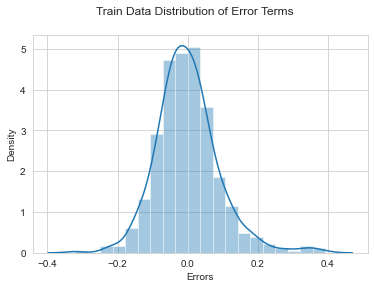

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Train Data Distribution of Error Terms')                  # Plot heading 
plt.xlabel('Errors')  

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Errors')

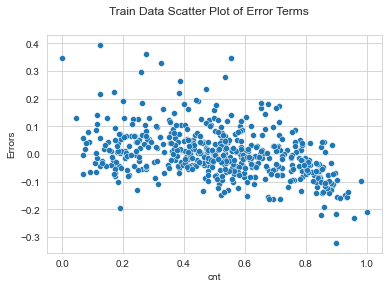

In [52]:
# Plot the scatter plot of the error terms
fig = plt.figure()
sns.scatterplot(y_train, residual)
fig.suptitle('Train Data Scatter Plot of Error Terms')
plt.ylabel('Errors') 

# Making Predictions Using the Final Model

In [53]:
vars = ['windspeed' , 'temp' , 'hum','cnt']

df_test[vars] = scaler.fit_transform(df_test[vars])

In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

# Creating X_test_new dataframe by dropping variables from X_test using the final X_train_lm.columns
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [56]:
# Making predictions
y_test_pred = lm.predict(X_test_new)
print(y_test_pred)

184    0.478511
535    0.944163
299    0.384040
221    0.609833
152    0.644017
         ...   
400    0.302714
702    0.702109
127    0.477926
640    0.821733
72     0.288447
Length: 219, dtype: float64


# Model Evaluation

In [57]:
#r2 score of train data
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8416417274131027

In [58]:
#r2 score of test data
r2_score(y_test, y_test_pred)

0.8058680916848985

In [59]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,  y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test,  y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,  y_test_pred)))

MAE: 0.08013562343202632
MSE: 0.011010840391867161
RMSE: 0.10493255163135586


In [60]:
#Plot y_train vs y_train_pred and y_test vs y_test_pred

Text(0, 0.5, 'y_test_pred')

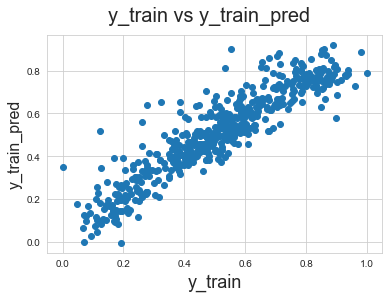

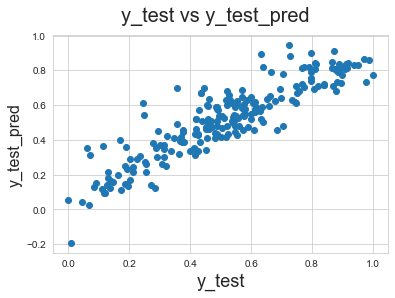

In [61]:

fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)               
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_pred', fontsize=16)                    

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)                     



# REPORT:

In [ ]:
Linear regression equation of our final model with 11 variables:
    
    COUNT=0.1698 + 0.5709* temp + 0.2294*yr_2019 + 0.1407*season_winter + 0.1025*mnth_Sep + 0.0899*season_summer + 0.0630*day_Saturday +  0.0536*workingday - 0.2439*weather_light rain and snow - 0.1861*windspeed -  0.1613*hum  -  0.0553*weather_mist and cloudy                          -0.1613                      -0.1861 

In [ ]:
Variables and their co-efficients:
const                           0.1698      
workingday                      0.0536      
temp                            0.5709          
hum                            -0.1613     
windspeed                      -0.1861      
mnth_Sep                        0.1025      
season_summer                   0.0899      
season_winter                   0.1407      
weather_light rain and snow    -0.2439     
weather_mist and cloudy        -0.0553      
day_Saturday                    0.0630        
yr_2019                         0.2294

In [ ]:
The four variables that are significant in predicting the demand for shared bikes:
    1.Temperature
    2.year_2019
    3.season_winters
    4.month_sep

In [ ]:
CONCLUSIONS:
  1.R-sqaured and Adjusted R-squared - 0.842 and 0.838 - 82% variance explained.
  2.F-stats and Prob(F-stats) (overall model fit) - 240.6 and 2.89e-191(approx. 0.0) - Model fit is significant 
  3.p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
  predictors are statistically significant.